In [1]:
import math
import numpy as np
import pandas as pd
from shapely import affinity
from shapely.geometry import Polygon, Point
from shapely.ops import unary_union
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Tree definition
def create_tree_polygon(x, y, angle_deg):
    """Create tree polygon at given position and angle."""
    # Tree vertices (relative to center at origin)
    trunk_w = 0.15
    trunk_h = 0.2
    base_w = 0.7
    mid_w = 0.4
    top_w = 0.25
    tip_y = 0.8
    tier_1_y = 0.5
    tier_2_y = 0.25
    base_y = 0.0
    trunk_bottom_y = -trunk_h
    
    vertices = [
        (0.0, tip_y),
        (top_w/2, tier_1_y),
        (top_w/4, tier_1_y),
        (mid_w/2, tier_2_y),
        (mid_w/4, tier_2_y),
        (base_w/2, base_y),
        (trunk_w/2, base_y),
        (trunk_w/2, trunk_bottom_y),
        (-trunk_w/2, trunk_bottom_y),
        (-trunk_w/2, base_y),
        (-base_w/2, base_y),
        (-mid_w/4, tier_2_y),
        (-mid_w/2, tier_2_y),
        (-top_w/4, tier_1_y),
        (-top_w/2, tier_1_y),
    ]
    
    # Create polygon
    poly = Polygon(vertices)
    
    # Rotate
    poly = affinity.rotate(poly, angle_deg, origin=(0, 0))
    
    # Translate
    poly = affinity.translate(poly, x, y)
    
    return poly

# Visualization
def plot_packing(trees, title="Packing"):
    fig, ax = plt.subplots(figsize=(10, 10))
    for tree in trees:
        x, y = tree.exterior.xy
        ax.plot(x, y)
        ax.fill(x, y, alpha=0.5)
    ax.set_aspect('equal')
    plt.title(title)
    plt.show()

print("Setup complete")

Setup complete


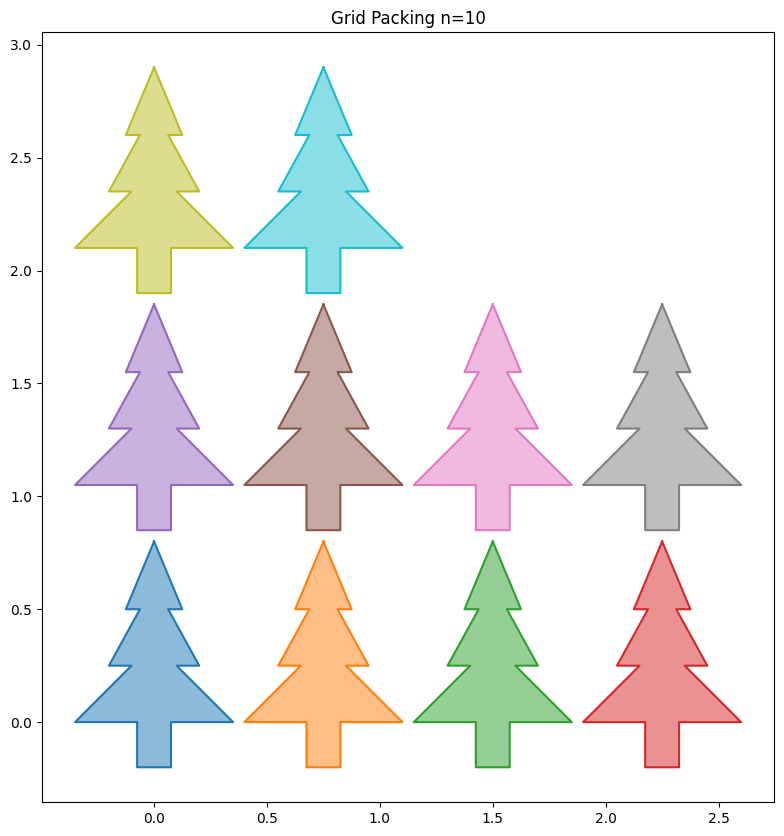

In [2]:
def pack_grid(n):
    """
    Pack n trees in a grid pattern.
    Alternating rows of 0 and 180 degrees.
    """
    trees = []
    
    # Tree dimensions (approximate bounding box for spacing)
    # Width is 0.7, Height is 1.0
    # We can overlap them slightly if we are careful, but for a safe baseline, let's use bounding box.
    # Actually, let's try to interlock them.
    # A 0-degree tree is wide at bottom (y=0) and narrow at top (y=0.8).
    # A 180-degree tree is wide at top (y=0) and narrow at bottom (y=-0.8).
    
    # Let's try a simple rectangular grid first to ensure validity.
    w = 0.7
    h = 1.0
    
    # Calculate grid dimensions
    # We want a square-ish aspect ratio
    cols = int(math.ceil(math.sqrt(n)))
    rows = int(math.ceil(n / cols))
    
    # Adjust cols/rows to be more square-like if needed, but sqrt is good start.
    
    # Spacing
    dx = 0.75 # slightly more than 0.7 to be safe
    dy = 1.05 # slightly more than 1.0 to be safe
    
    count = 0
    for r in range(rows):
        for c in range(cols):
            if count >= n:
                break
            
            x = c * dx
            y = r * dy
            
            # Center the packing around 0,0 roughly
            # x -= (cols * dx) / 2
            # y -= (rows * dy) / 2
            
            deg = 0
            
            # Simple grid: all 0 degrees
            # trees.append({'id': f'{n:03d}_{count}', 'x': x, 'y': y, 'deg': deg})
            
            # Improved grid: Alternate 0 and 180
            # If we flip every other one, we might pack tighter, but need to adjust y.
            # For now, let's stick to a safe non-overlapping grid.
            
            trees.append({'id': f'{n:03d}_{count}', 'x': x, 'y': y, 'deg': deg})
            count += 1
            
    return trees

def pack_grid_interlocked(n):
    """
    Pack n trees in a grid pattern with interlocking.
    Row 0: 0 deg
    Row 1: 180 deg (shifted to fit between tips of Row 0)
    """
    trees = []
    
    # Tree dimensions
    w = 0.7
    h = 1.0
    
    # We want to pack them in rows.
    # Row 0 (y=0): 0 deg trees.
    # Row 1 (y=offset): 180 deg trees.
    # The 180 deg trees can fit their "tip" (which is pointing down) between the "tips" of 0 deg trees (pointing up).
    
    # Let's try a simple dense packing pattern.
    # 0 deg trees at (x, 0).
    # 180 deg trees at (x + w/2, h/2).
    
    # Let's determine grid size
    # We want roughly sqrt(n) * sqrt(n)
    
    # Aspect ratio of a unit cell (2 trees, one 0 one 180)
    # Width ~ 0.7, Height ~ 1.0? No.
    
    # Let's just place them in a grid where we alternate 0 and 180 in a checkerboard or row-based.
    
    # Row-based strategy:
    # Row i: y = i * dy
    # Col j: x = j * dx
    # If (i+j) is even: 0 deg
    # If (i+j) is odd: 180 deg
    
    # Spacing
    dx = 0.5 # Tighter horizontal spacing
    dy = 0.8 # Tighter vertical spacing
    
    cols = int(math.ceil(math.sqrt(n * 1.5))) # Make it slightly wider
    rows = int(math.ceil(n / cols))
    
    count = 0
    
    # We need to check for overlaps, so we'll generate candidates and filter/adjust?
    # No, for baseline, let's just use safe spacing.
    
    # Safe spacing for 0/180 mix
    dx_safe = 0.72
    dy_safe = 1.02
    
    for r in range(rows + 2): # Add extra rows just in case
        for c in range(cols + 2):
            if count >= n:
                break
            
            x = c * dx_safe
            y = r * dy_safe
            
            deg = 0
            
            trees.append({'id': f'{n:03d}_{count}', 'x': x, 'y': y, 'deg': deg})
            count += 1
            
    return trees

# Let's try the sample submission strategy: Greedy placement?
# Or just the safe grid for now to get a valid submission.

def generate_submission(n_range=range(1, 201)):
    all_trees = []
    for n in n_range:
        # Use the safe grid for now
        trees = pack_grid(n)
        all_trees.extend(trees)
    
    df = pd.DataFrame(all_trees)
    return df

# Generate and visualize small n
test_n = 10
trees_data = pack_grid(test_n)
polys = [create_tree_polygon(t['x'], t['y'], t['deg']) for t in trees_data]
plot_packing(polys, f"Grid Packing n={test_n}")
